# Кластерный анализ
## Метод к-средних



Дана матрица данных $X$ и дано число $k$ предполагаемых кластеров. Цель кластеризации представить данные в виде групп кластеров $C=\{C_1, C_2, \ldots, C_k\}$. Каждый кластер имеет свой центр:

\begin{equation}
\mu_i = \frac{1}{n_i} \sum \limits_{x_j \in C_i} x_j
\end{equation}

где $n_i = |C_i|$ - это количество точек в кластере $C_i$.

Таким образом, мы имеем некоторые кластеры $C=\{C_1, C_2, \ldots, C_k\}$ и необходимо оценить качество разбиения. Для этого будем вычислять сумму квадратических ошибок (SSE):

\begin{equation}
SSE(C) = \sum \limits_{i=1}^{k} \sum \limits_{x_j \in C_i} ||x_j - \mu_i||^2
\end{equation}

Цель найти
\begin{equation}
C^* = arg\min\limits_C \{SSE(C)\}
\end{equation}

### Алгоритм к-средних
На вход алгоритм получает матрицу данных $D$, количество кластеров $k$, и критерий остановки $\epsilon$:
1. t = 0
2. случайным образом инициализируем $k$ центров кластеров: $\mu_1^t, \mu_2^t, \ldots, \mu_k^t \in R^d$;
3. повторять
    4. $t = t + 1$;
    5. $C_j = 0$ для всех $j = 1, \ldots, k$
    6. для каждого $x_j \in D$
        7. $j^* = arg\min\limits_C \{||X_j - \mu_i^{t-1}||^2\}$ \\\ присваиваем $x_j$ к ближайшему центру
        8. $C_{j^*} = C_{j^*} \cup {x_j}$
    9. для каждого i=1 до k
        10. $\mu_i = \frac{1}{|C_i|} \sum_{x_j \in C_i} x_j$
11. пока $\sum_{i=1}^k ||\mu_i^{t} - \mu_i^{t-1}||^2 \leq \epsilon$

In [13]:
def kmeans(D, k, stop):
    t = 0
    arrX = (D[0].max()-D[0].min()) * np.random.random_sample((1, k)) + D[0].min()
    arrY = (D[1].max()-D[1].min()) * np.random.random_sample((1, k)) + D[1].min()
    mOld = np.array([[arrX[0][i],arrY[0][i]] for i in range(k)])
    mNew = np.copy(mOld)
    #clasters = [[] for i in range(k)]
    while(np.sum([np.linalg.norm(mNew[i,:]-mOld[i,:])**2 for i in range(3)])<stop):   
        clasters = [[] for i in range(k)]
        mOld = np.copy(mNew)
        for j in range(D.shape[0]):     
            norms = [np.linalg.norm(D[j,:]-mOld[i,:])**2 for i in range(k)]
            ah = np.where(norms == np.min(norms))[0][0]
            clasters[ah].append(list(D[j,:]))     
        #mNew = np.array([list(np.sum(clasters[i],axis=0)/len(clasters[i])) for i in range(k)])
        mNew = np.array([(np.mean(clasters[i], axis = 0))for i in range(k)])
    return clasters, mNew

In [14]:
def k_means(features, k, check=True):
    old_cluster = np.zeros(features.shape[0])
    cluster = np.ones(features.shape[0])
    buf = np.arange(features.shape[0])
    choices = np.random.choice(buf, k)
    mu = features[choices]
    sses = []
    while not np.array_equal(old_cluster, cluster):
        old_cluster = cluster        
        dists = []
        for mn in mu:
            dists.append(np.linalg.norm(features - mn, axis=1))
        cluster = np.argmin(dists, axis=0)
        mu = np.array([np.mean(features[cluster == it], 0) for it in range(k)])   
        if(check):            
            plt.scatter(features[:, 0], features[:, 1], c=cluster)
            for i in range(len(mu)):
                plt.scatter(mu[i][0],mu[i][1],marker='4',s=150, color = 'black')      
            plt.show()
    for i in range(len(mu)):
        temp = features[[j for j,v in enumerate(cluster) if v==i]] - mu[i]
        resSSE = np.array([np.linalg.norm(temp[j])**2 for j in range(len(temp))])
        sses.append(resSSE.sum())
    return cluster, mu, np.array(sses).sum()

## Задание
1. Написать программу, реализующую алгоритм к-средних.
2. Визуализировать сходимость центров кластеров.
3. Оценить $SSE$ для значений $k = 1, \ldots, 10$ и построить график зависимости $SSE$ от количества кластеров.

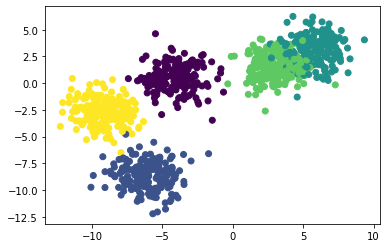

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import random
import numpy as np
X, Y = make_blobs(n_samples = 1000, n_features=2, centers=5, cluster_std = 1.2, random_state=17)
plt.scatter(X[:,0], X[:,1],c=Y)

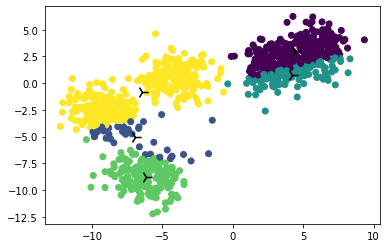

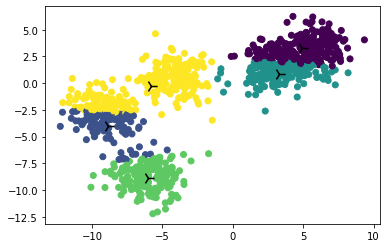

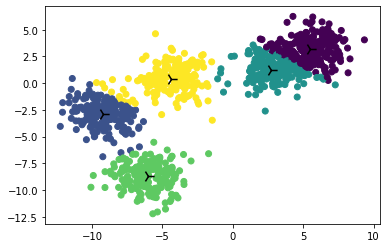

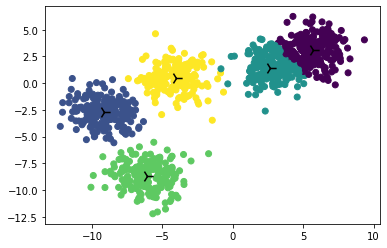

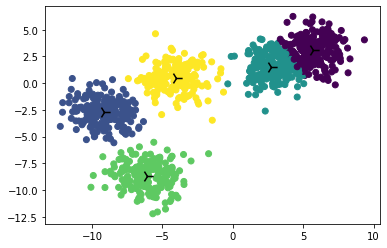

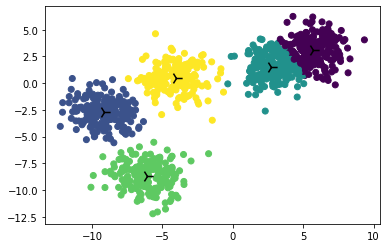

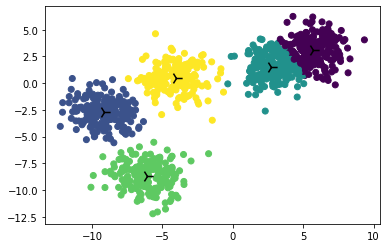

In [16]:

aa, bb, cc = k_means(X,5)

In [17]:
cc/X.shape[0]

2.801073147055679

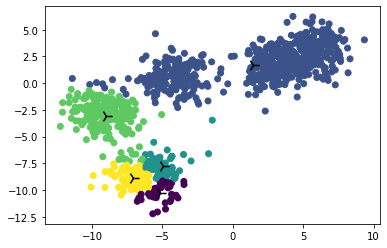

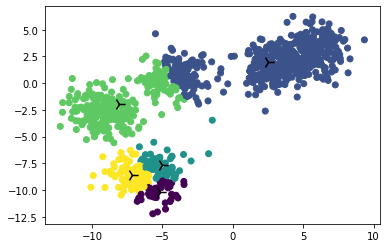

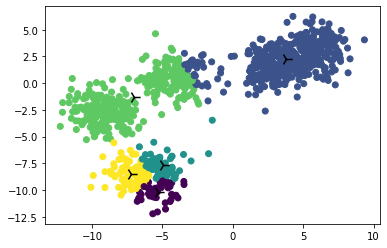

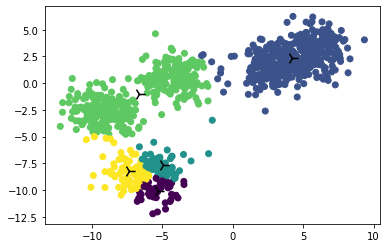

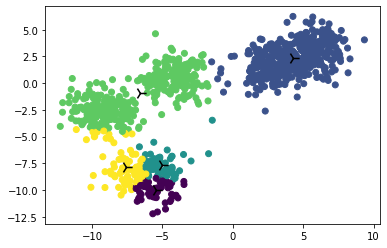

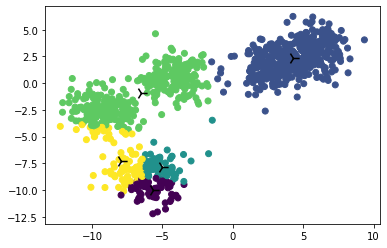

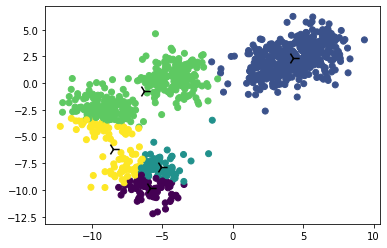

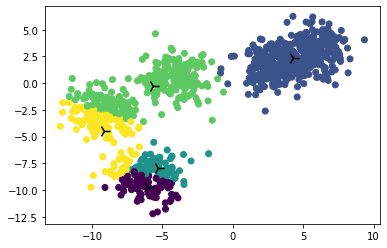

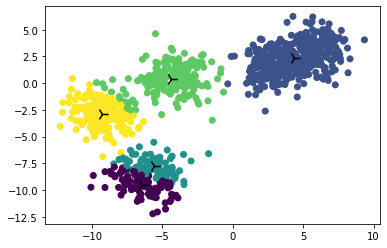

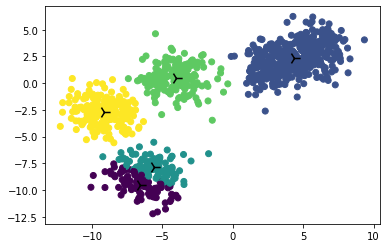

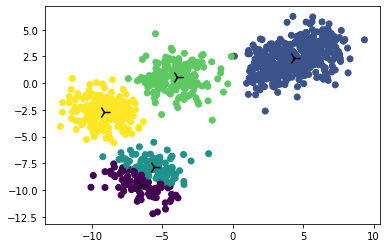

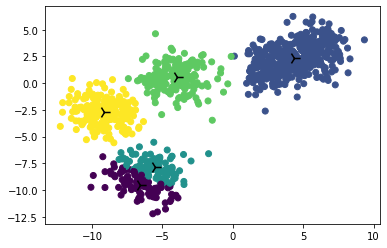

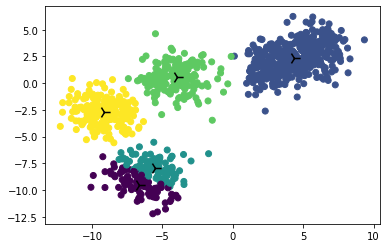

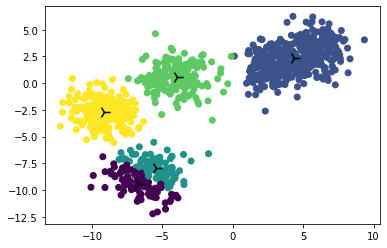

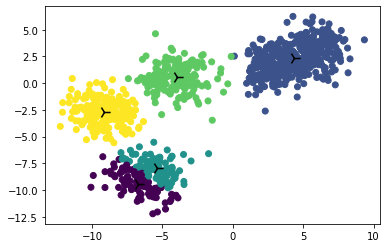

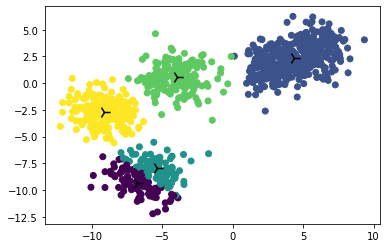

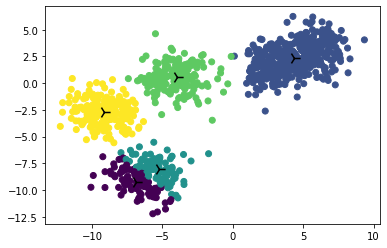

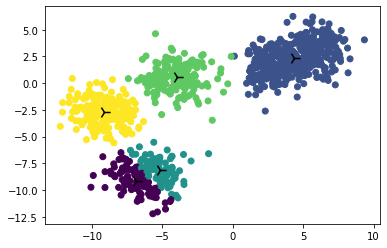

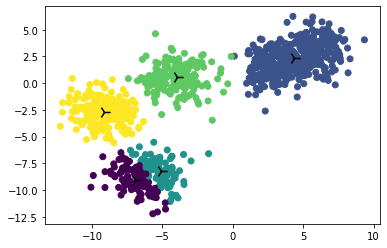

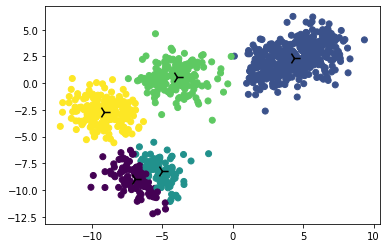

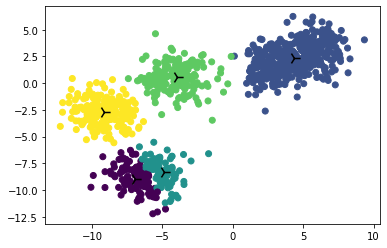

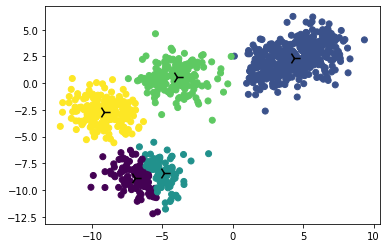

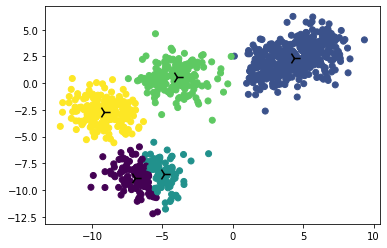

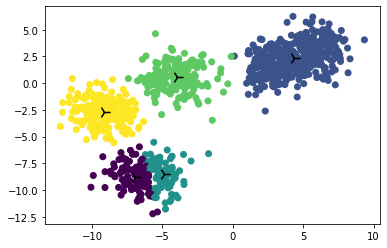

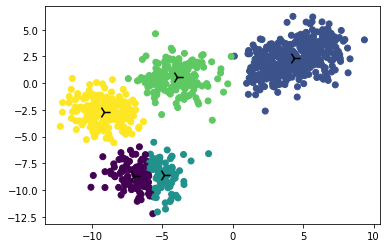

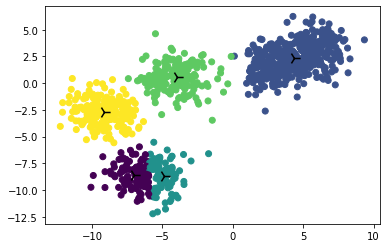

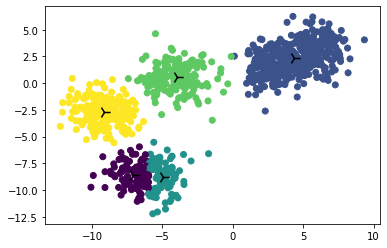

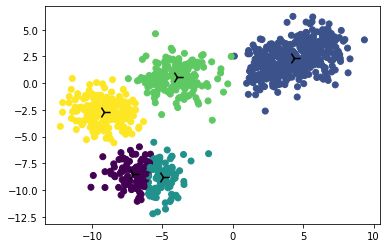

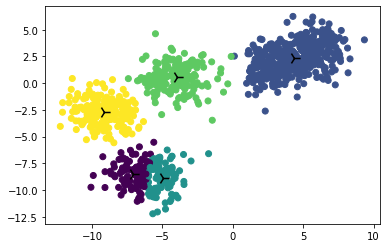

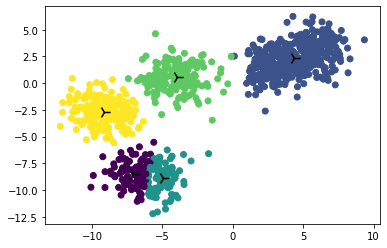

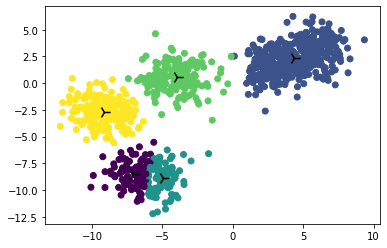

In [18]:
aa1, bb1, cc1 = k_means(X,5)

In [19]:
cc1/X.shape[0]

3.7253461437412843

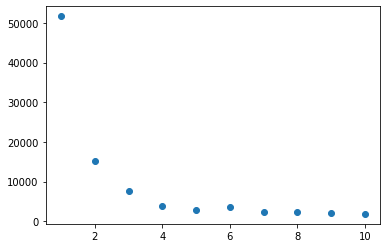

In [20]:
massive = []
for i in range(1,11):
    a,b,c = k_means(X,i,False)
    massive.append(c)
plt.scatter(range(1,11),massive)

In [21]:
aaaa = KMeans(5)
aaaa.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

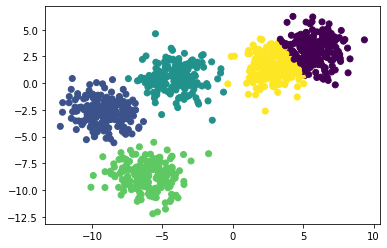

In [22]:
plt.scatter(X[:,0],X[:,1],c=aaaa.predict(X))

## Реальные данные

используйте метод KMeans из sklearn.clustering

1. Выбрать оптимальное количество кластеров.
2. Построить 
2. Произвести анализ получившихся кластеров:
    1. определите средний год автомобилей;
    2. определите средний пробег автомобилей;
    3. определите среднюю мощность;
    4. определите среднюю цену автомобилей;
    5. основные марки автомобилей в кластере;
    6. определите тип топлива;
    7. определите основной тип кузова;
    8. определите основной тип привода;
    9. определите основной тип КПП;
    10. определите количество хозяев автомобиля.
Охарактеризуйте каждый класстер.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('data.csv', encoding='cp1251')
df = df.drop(columns=['Модель', 'Цвет'])
df.head()

,Марка,Год,Состояние,Пробег,Объем,Топливо,Мощность,Кузов,Привод,КПП,Руль,Хозяев в ПТС,Цена
0,Volkswagen,2013.0,БУ,42000.0,1200.0,бензин,105.0,хэтчбек,передний,автомат,левый,1 владелец,689196.0
1,Skoda,2012.0,БУ,62000.0,1800.0,бензин,152.0,кроссовер,полный,механика,левый,1 владелец,639196.0
2,Renault,2015.0,БУ,4700.0,1600.0,бензин,106.0,хэтчбек,передний,механика,левый,1 владелец,629196.0
3,Nissan,2012.0,БУ,70000.0,1600.0,бензин,110.0,хэтчбек,передний,автомат,левый,1 владелец,479196.0
4,УАЗ,2014.0,БУ,50000.0,2700.0,бензин,128.0,внедорожник,полный,механика,левый,1 владелец,599196.0


In [24]:
new_df = pd.get_dummies(df)
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,2013.0,42000.0,1200.0,105.0,689196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,2012.0,62000.0,1800.0,152.0,639196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2015.0,4700.0,1600.0,106.0,629196.0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,2012.0,70000.0,1600.0,110.0,479196.0,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,2014.0,50000.0,2700.0,128.0,599196.0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [25]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']] = ss.fit_transform(new_df[['Год', 'Пробег', 'Объем', 'Мощность', 'Цена']])
new_df.head()

,Год,Пробег,Объем,Мощность,Цена,Марка_Acura,Марка_Alfa Romeo,Марка_Audi,Марка_BMW,Марка_BYD,...,Привод_полный,КПП_автомат,КПП_вариатор,КПП_механика,КПП_роботизированная,Руль_левый,Руль_правый,Хозяев в ПТС_1 владелец,Хозяев в ПТС_2 владельца,Хозяев в ПТС_3 и более
0,1.055883,-1.129295,-1.096928,-0.458895,0.420103,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0.868335,-0.842782,-0.125615,0.440164,0.315187,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,1.430978,-1.663641,-0.449386,-0.439766,0.294203,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0.868335,-0.728177,-0.449386,-0.363250,-0.020546,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,1.243431,-1.014690,1.331355,-0.018930,0.231254,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


In [26]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
inertia = []
for it in np.arange(10,11,1):
    method = KMeans(n_clusters=it)
    method.fit(new_df)
    inertia.append(method.inertia_)
    print(it)

10


In [27]:
def cls_info(df, k):
    print('------ Кластер ', k, ' -------')
    claster =  df[method.labels_ == k]
    print(claster['Год'].mean())
    print(claster['Пробег'].mean())
    print(claster['Объем'].mean())
    print(claster['Мощность'].mean())
    print(claster['Цена'].mean())
    print('---------------------------')
    print(claster['Привод'].value_counts().head(1))
    print('---------------------------')
    print(claster['Марка'].value_counts().head(2))
    print('---------------------------')
    print(claster['Кузов'].value_counts().head(2))
    print('---------------------------')
    print(claster['КПП'].value_counts().head(2))
    print('*****************************')

In [28]:
for it in range(10):
    cls_info(df, it)

------ Кластер  0  -------
2006.1973398479913
151981.77985884907
2303.257328990228
161.9885993485342
520911.6520086862
---------------------------
полный    1984
Name: Привод, dtype: int64
---------------------------
Hyundai    318
Nissan     313
Name: Марка, dtype: int64
---------------------------
седан        1325
кроссовер     975
Name: Кузов, dtype: int64
---------------------------
автомат     2282
механика    1197
Name: КПП, dtype: int64
*****************************
------ Кластер  1  -------
2011.2930648769575
75750.64106388268
1636.4901814566244
126.75689783743475
589247.4432015908
---------------------------
передний    3867
Name: Привод, dtype: int64
---------------------------
Volkswagen    457
Hyundai       382
Name: Марка, dtype: int64
---------------------------
седан      1997
хэтчбек    1400
Name: Кузов, dtype: int64
---------------------------
автомат     3694
вариатор     166
Name: КПП, dtype: int64
*****************************
------ Кластер  2  -------
2013.05874